In [86]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

# First step will be to import the feature data and the labels
data_filename = "data.csv"
data = pd.read_csv(data_filename)
data

,participant_id,trial_number,window_number,valence,arousal,dominance,liking,channel 1,channel 2,channel 3,...,channel 23,channel 24,channel 25,channel 26,channel 27,channel 28,channel 29,channel 30,channel 31,channel 32
0,1,1,1,7.71,7.60,6.90,7.83,0.033385,0.036152,0.032010,...,0.025104,0.004670,0.007016,0.010379,0.055277,0.028656,0.039008,0.048959,0.040942,0.028137
1,1,1,2,7.71,7.60,6.90,7.83,0.025876,0.045525,0.057520,...,0.027062,0.000000,0.110960,0.067448,0.074109,0.003076,0.083453,0.035748,0.118700,0.102720
2,1,1,3,7.71,7.60,6.90,7.83,0.135500,0.154240,0.163100,...,0.082909,0.125100,0.006438,0.191590,0.171590,0.067423,0.149850,0.229360,0.174830,0.178320
3,1,1,4,7.71,7.60,6.90,7.83,0.013053,0.008499,0.000000,...,0.024392,0.006908,0.002000,0.002324,0.034620,0.069139,0.016468,0.076436,0.023898,0.027894
4,1,1,5,7.71,7.60,6.90,7.83,0.034665,0.003855,0.018268,...,0.026372,0.026009,0.007074,0.040993,0.018634,0.029714,0.035454,0.018850,0.039933,0.052064
5,1,2,1,8.10,7.31,7.28,8.47,0.102740,0.057676,0.053584,...,0.040267,0.020417,0.064596,0.013100,0.022531,0.021377,0.075810,0.052138,0.072882,0.075545
6,1,2,2,8.10,7.31,7.28,8.47,0.000000,0.000000,0.000000,...,0.016493,0.011931,0.020997,0.012681,0.017539,0.038779,0.002191,0.012940,0.009202,0.013760
7,1,2,3,8.10,7.31,7.28,8.47,0.029368,0.050232,0.038001,...,0.019065,0.008871,0.034635,0.015144,0.011006,0.005741,0.009609,0.035295,0.034423,0.076906
8,1,2,4,8.10,7.31,7.28,8.47,0.004037,0.011773,0.000000,...,0.034950,0.041211,0.008379,0.020340,0.021702,0.004936,0.008693,0.041525,0.020818,0.033863
9,1,2,5,8.10,7.31,7.28,8.47,0.091790,0.064581,0.041244,...,0.097910,0.143210,0.070079,0.020956,0.047347,0.184720,0.058700,0.009588,0.085065,0.117290


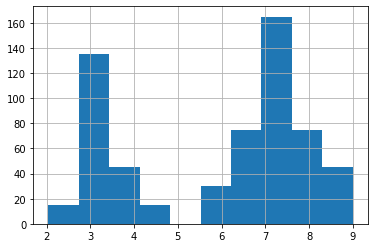

In [87]:
data['dominance'].hist()
plt.show()

In [88]:
# We will be trying to classify based on arousal for this experiment
y = data[['participant_id','trial_number','window_number','arousal']];
channel_names = [ "channel " + str(i) for i in range(1,33)]
X = data[['participant_id', 'trial_number','window_number'] + channel_names]

In [104]:
# Should leave one of the subject out of the classification and use the rest for training a basic
# Need to look at ai.py in the Scritps/AEC vs wPLI Comparison project
# Machine Learning 

# Will do minmax normalization on the features
from sklearn import preprocessing

# This is how we would normalize the data
# However we need to normalize each time in the training set and the test set independently (can't do it on the whole set)
example_min_max_scaler = preprocessing.MinMaxScaler()
example_data = example_min_max_scaler.fit_transform(data[channel_names].values)

In [132]:
# Classification 
# we want to do a first run where we check which classifiers from a list is better for this task (will go with svm only)

# Machine Learning 
from sklearn.svm import SVR
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.base import clone
from sklearn.metrics import r2_score

number_participants = np.max(data['participant_id'].values)
reg_label = 'arousal'
regs = [SVR(kernel='linear', C=0.1), SVR(kernel='linear', C=0.5), SVR(kernel='linear', C=1.0), SVR(kernel='rbf', C=0.1,gamma='scale'), SVR(kernel='rbf',C=1.0,gamma='scale')]

# Regression function with LOSO cross validation
def regress(dataframe, template_reg, number_participants, channel_names, reg_label):
    reg = clone(template_reg)
    
    r_score = []
    # Need to do +1 to have the last id
    for test_participant_id in range(1,number_participants+1):
        print("Participant: " + str(test_participant_id) + " in hold-out set:")
        
        # Getting the training and test dataframe
        test_dataframe = dataframe.loc[dataframe['participant_id'] == test_participant_id].copy(deep=True)
        train_dataframe = dataframe.loc[dataframe['participant_id'] != test_participant_id].copy(deep=True)
        
        # Preprocessing the train and test data
        train_min_max_scaler = preprocessing.MinMaxScaler()
        train_dataframe[channel_names] = train_min_max_scaler.fit_transform(train_dataframe[channel_names].values)
        
        test_min_max_scaler = preprocessing.MinMaxScaler()
        test_dataframe[channel_names] = test_min_max_scaler.fit_transform(test_dataframe[channel_names].values)
        
        # training the regressor on the training data (using arousal here)
        X_train = train_dataframe[channel_names];
        y_train = train_dataframe[reg_label]
        reg.fit(X_train, y_train)
        
        # testing the regressor on the holdout participant data
        X_test = test_dataframe[channel_names]
        y_true = test_dataframe[reg_label]
        y_pred = reg.predict(X_test)
        
        r2_score.append(r2_score(y_true, y_pred)))  

    return r2_score
        
regress(data,regs[1],number_participants, channel_names,reg_label)

Participant: 1 in hold-out set:
0.03484760667199216
Participant: 2 in hold-out set:
0.006352506015878001
Participant: 3 in hold-out set:
0.03886797700566724
